# 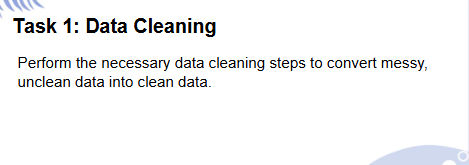

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
hotel_dataset=pd.read_csv('Downloads/DS1_C5_S5_Hotel Dataset (1).csv')
hotel_dataset.shape #(2097, 32)
hotel_dataset.info()
# columnsa with missing values
#agent, company

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

# Replaced Missing values of agent

In [14]:
hotel_dataset['agent'].isnull().sum()
hotel_dataset['agent'].fillna(hotel_dataset['agent'].median(),inplace=True)


C:\Users\asher\AppData\Local\Temp\ipykernel_18928\4009952128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_dataset['agent'].fillna(hotel_dataset['agent'].median(),inplace=True)


In [15]:
hotel_dataset['agent'].isnull().sum()

0

# Replacing Missing values of company

In [17]:
hotel_dataset['company'].unique()

array([ nan, 281., 360., 498., 223.,   9.,  11., 183., 197., 174., 169.,
       153., 293., 332., 351.,  73.])

In [18]:
hotel_dataset['company'].isnull().sum()# droping it since this column does not look important

2066

In [19]:
hd=hotel_dataset

In [20]:
hd=hd.drop('company',axis=1)

In [21]:
for x in hd.columns:
    if hd[x].isnull().sum()==0:
        print('')
    else:
        print('empty') # so no null value is present

In [22]:
cat=hd.select_dtypes(include='object')

In [23]:
num=hd.select_dtypes(exclude='object')

In [24]:
c=[]
for x in cat.columns:
    c.append(x)
c

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [25]:
n=[]
for x in num.columns:
    n.append(x)
n

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [26]:
def check(x):
    if x in c:
        print('Cateogorical Column')
    elif x in n:
        print('Numerical Column')
    

In [27]:
check('customer_type')

Cateogorical Column


# 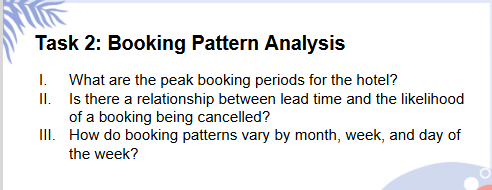

# 1)Peak booking Periods


In [30]:
hd.groupby('days_in_waiting_list')['days_in_waiting_list'].count()# so as most people got on the ssame day as they booked

days_in_waiting_list
0      2072
48        1
96       23
147       1
Name: days_in_waiting_list, dtype: int64

In [31]:
c=hd.groupby('arrival_date_month')['arrival_date_month'].count()
c

arrival_date_month
April        181
August       291
December      82
February      73
January       90
July         291
June         269
March        150
May          258
November      68
October      159
September    185
Name: arrival_date_month, dtype: int64

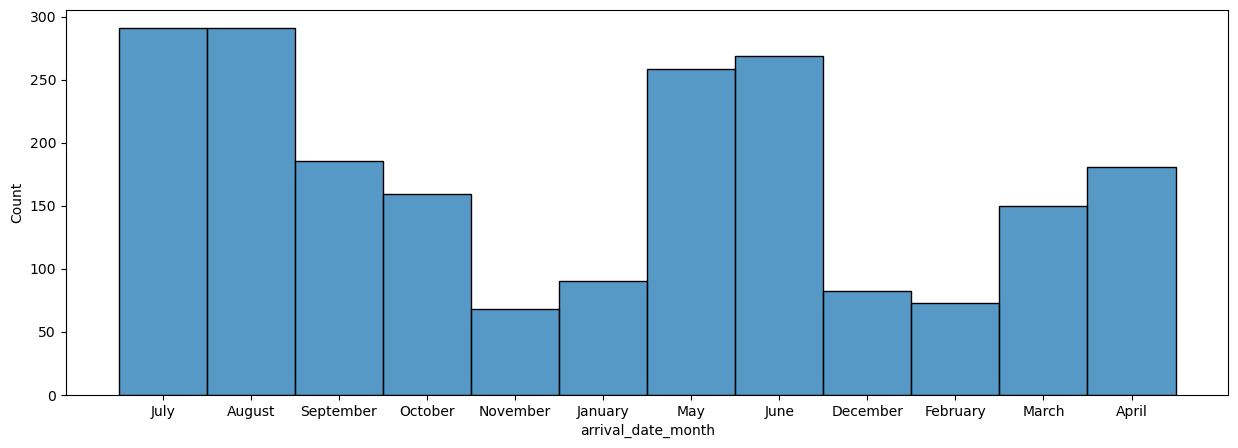

In [32]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(hd['arrival_date_month'])
plt.show()

# may to august(MAY,JUNE,JULY AND AUGUST )are the peak  booking periods for the hotel

# 2) is there a relationship between lead time and the likelihood of a booking being cancelled


In [35]:
#'lead_time',previous_cancellations

In [36]:
check('previous_cancellations')

Numerical Column


In [37]:
hd['lead_time'].corr(hd['previous_cancellations'])

C:\Users\asher\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\asher\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

In [95]:
import matplotlib.pyplot as plt

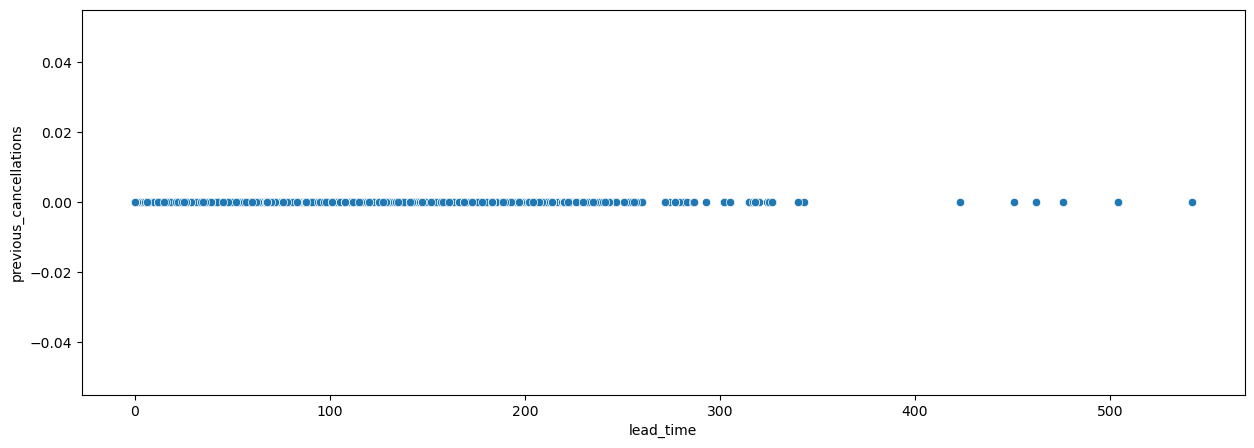

In [135]:
fig,ax=plt.subplots(figsize=(15,5))
sns.scatterplot(x=hd['lead_time'],y=hd['previous_cancellations'])
plt.show()

# no relationship betwwen lead time and previous_cancellations

# 3)How do Booking patterens vary by month,week,and day of the week?

In [41]:
hd.info()#lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

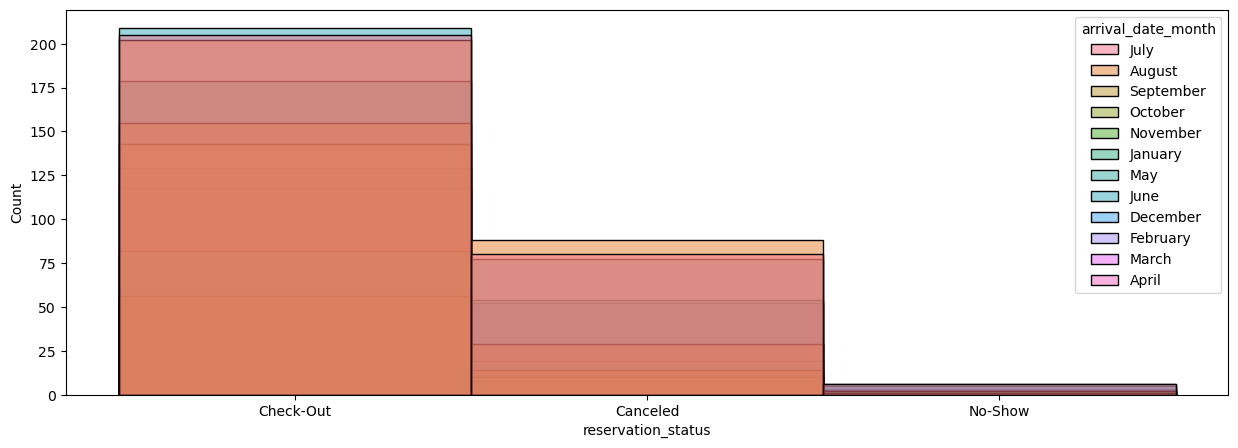

In [42]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reservation_status'],hue=hd['arrival_date_month'])
plt.show()

# most of them who book use the rooms .

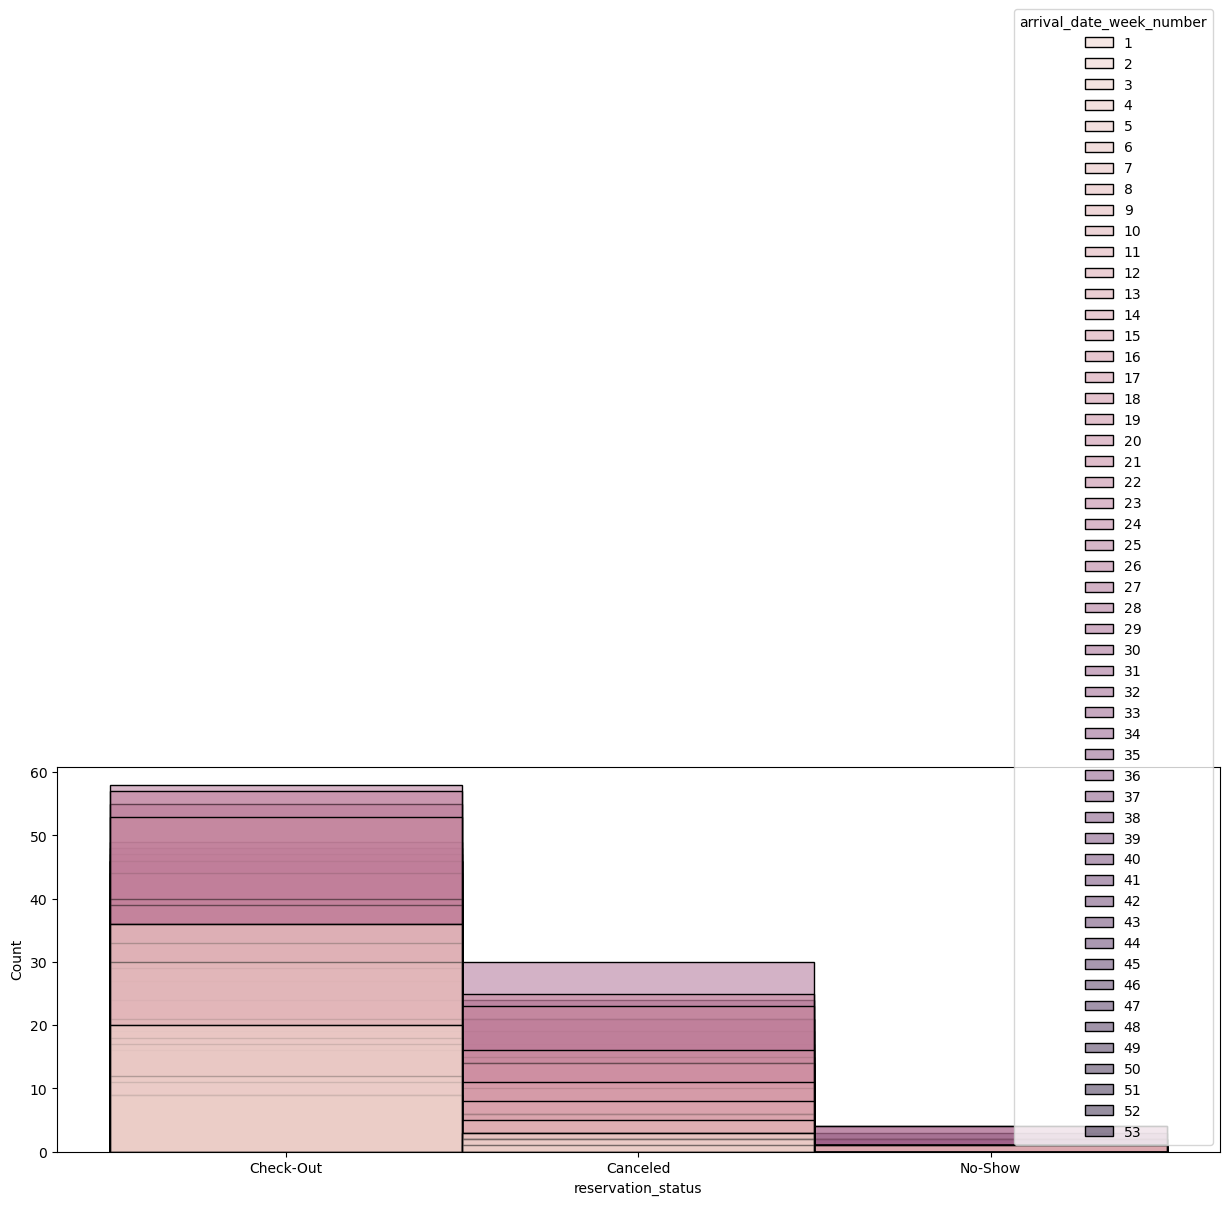

In [44]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reservation_status'],hue=hd['arrival_date_week_number'])
plt.show()

# most of them who book use the rooms .

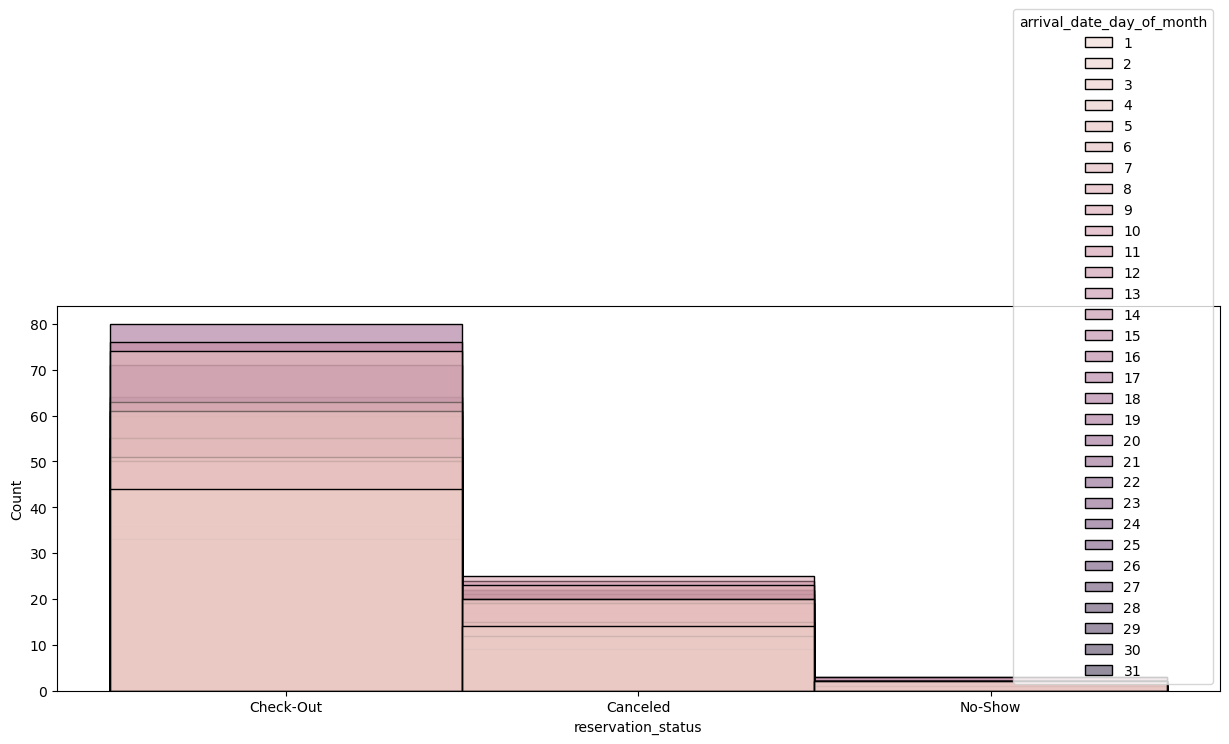

In [46]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reservation_status'],hue=hd['arrival_date_day_of_month'])
plt.show()

# most of them who book use the rooms .

# 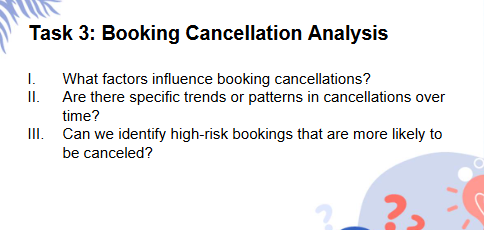

# Task 3: Booking Cancellation Analysis
I.
What factors influence booking cancellations?


In [50]:
import matplotlib.pyplot as plt

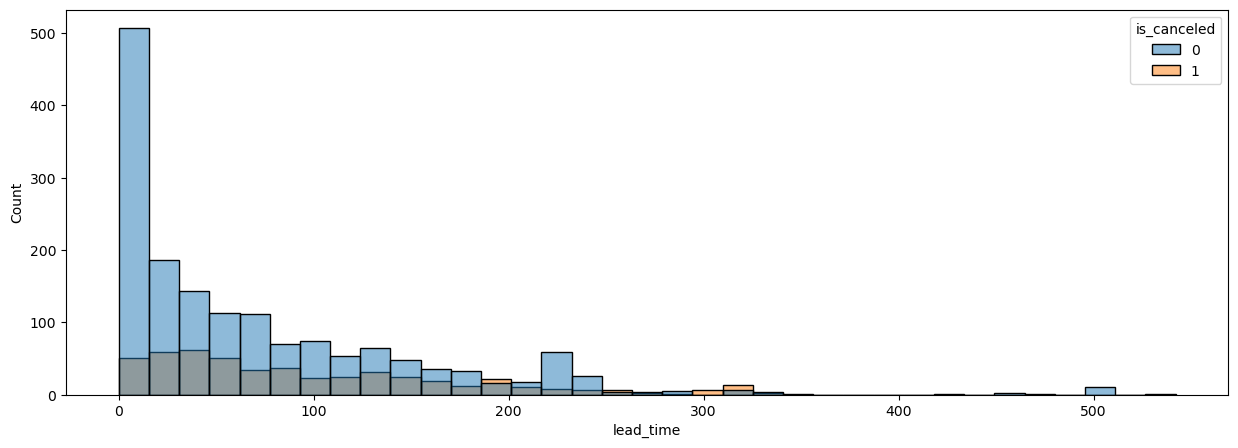

In [51]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['lead_time'],hue=hd['is_canceled'])
plt.show()
    #lead_time,previous_cancellations,booking_changes,

# lead timme did't influence because most customer''s book on that specific day.

# no column influence booking cancellation

# II. Are there specific trends or patterns in cancellations over time?


In [55]:
data =hd['reservation_status_date']
data = pd.to_datetime(data, format="%d-%m-%Y")
year = data.dt.year


In [56]:
hd['year']=year

In [57]:
a='05-07-2015'
a[4]

'7'

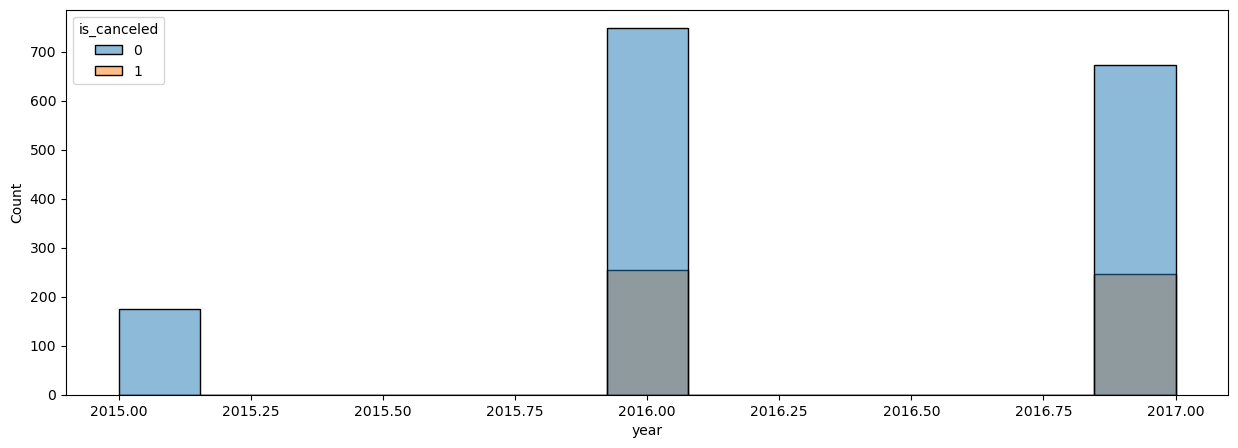

In [58]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['year'],hue=hd['is_canceled'])
plt.show()

# the cancelation have risen from 0 in 2015 to around 300 in  2016  and similar in 2017.

# III. Can we identify high-risk bookings that are more likely to be canceled?
?

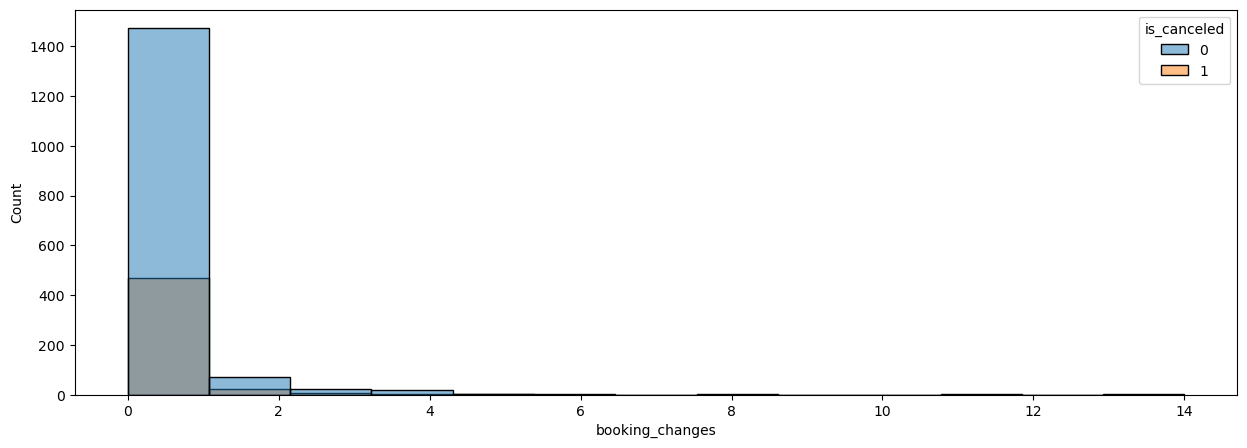

In [61]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['booking_changes'],hue=hd['is_canceled'])
plt.show()

# most have not made changes and  not canceled  

# 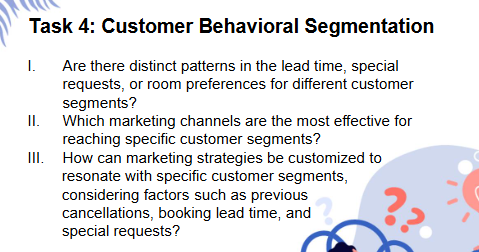

# Task 4: Customer Behavioral Segmentation
I.
Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?


In [65]:
#hd.info()#lead_time,total_of_special_requests,reserved_room_type

#  Are there distinct patterns in the lead time,for different customer segments?

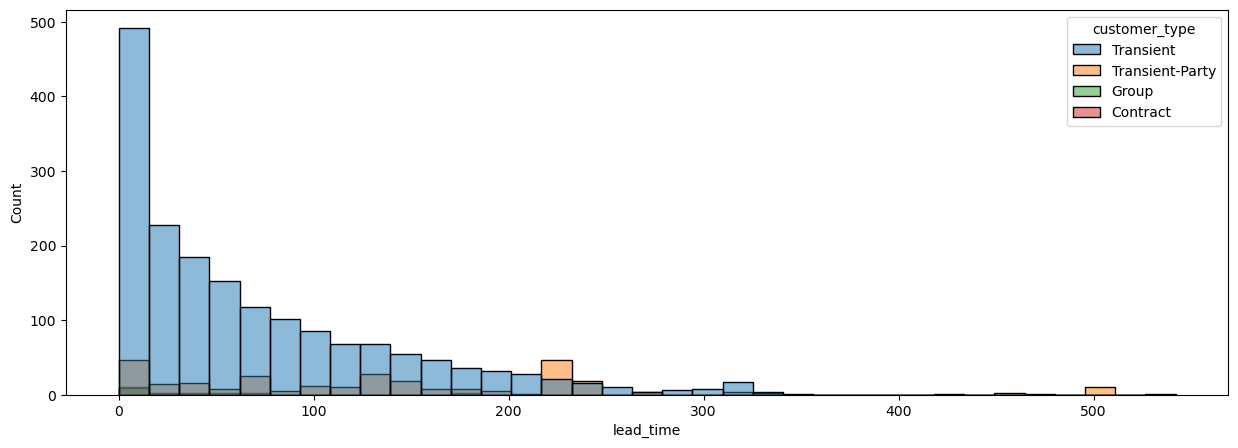

In [67]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['lead_time'],hue=hd['customer_type'])
plt.show()

# most people are transient and they book on the spot

# Are there distinct patterns in the special requests for different customer segments?

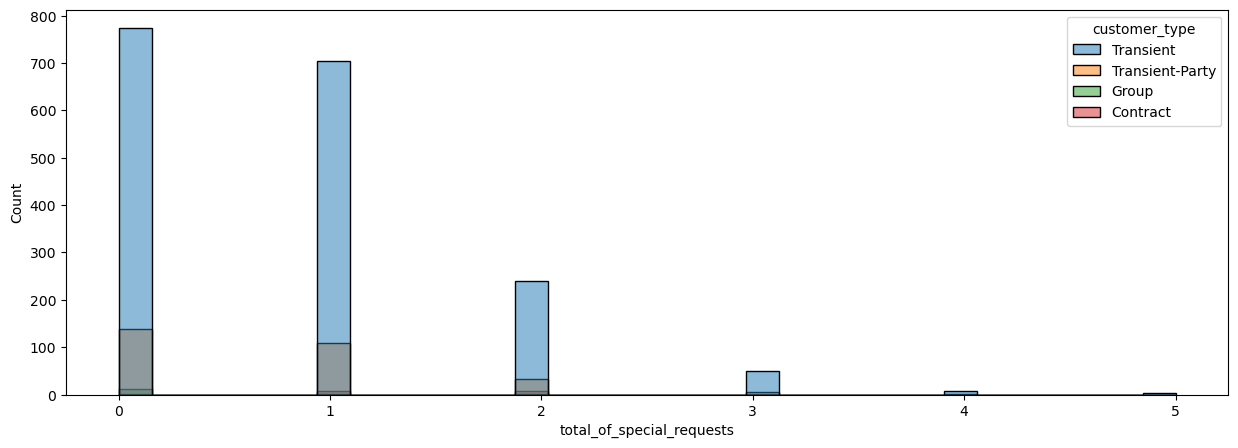

In [70]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['total_of_special_requests'],hue=hd['customer_type'])
plt.show()

# most are of transient type and most did't make any request but there are people who made requests with 5 requests beings the least in it.

# Are there distinct patterns in the room preferences for different customer segments?

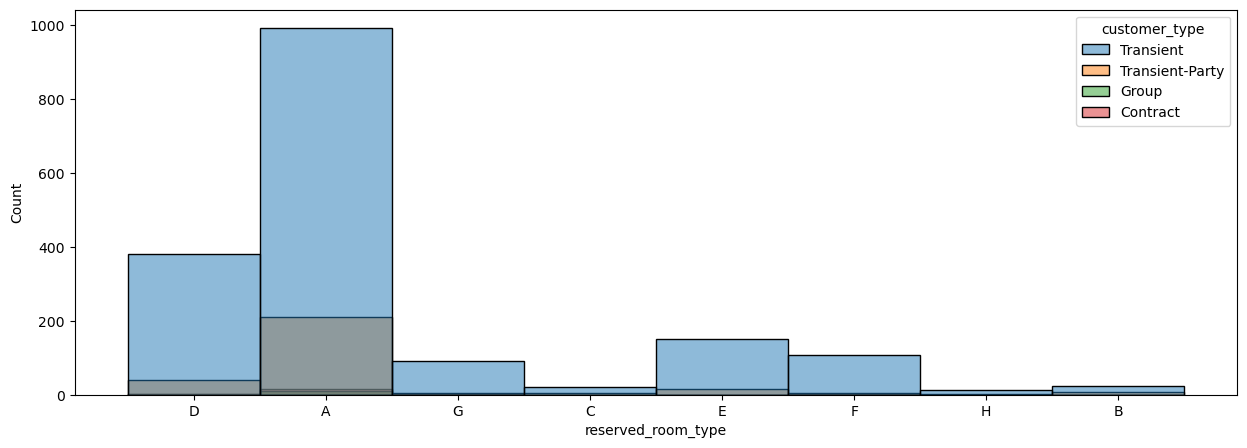

In [73]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['reserved_room_type'],hue=hd['customer_type'])
plt.show()

# most are of transient type and most took A room in it

# II. Which marketing channels are the most effective for reaching specific customer segments?


In [76]:
import matplotlib.pyplot as plt

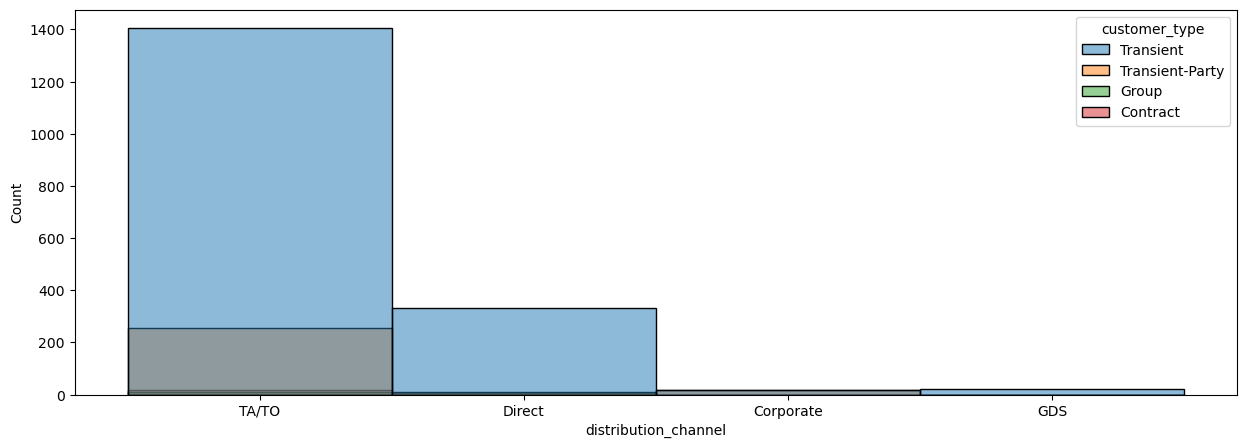

In [77]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['distribution_channel'],hue=hd['customer_type'])
plt.show()

# TA/TO is the most effective for reaching specific customer segments

# III. How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?

In [80]:
hd.info()#'distribution_channel','customer_type',   lead_time, previous_cancellations,total_of_special_requests

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

# we are taking lead time with lesser as longer lead time increases the risk of cancelation

#  assuming more requests mean the chances of them comming is more we taker it greater than or equal to 3

In [83]:
p=hd[(hd['lead_time']<30)|(hd['total_of_special_requests']>=3)]

C:\Users\asher\AppData\Local\Temp\ipykernel_18928\2209311995.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


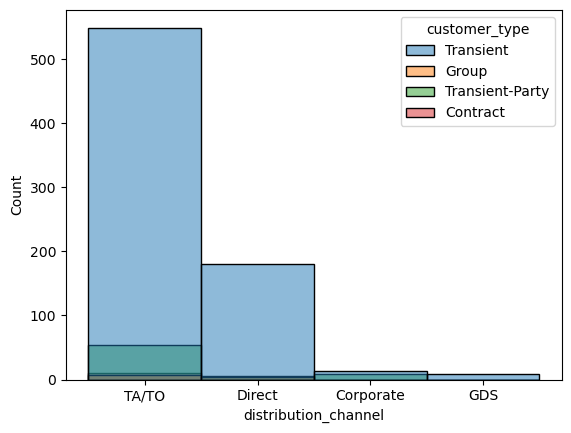

In [84]:
plt,ax=plt.subplots()
sns.histplot(x=p['distribution_channel'],hue=p['customer_type'])
plt.show()

# we have filtered data with lead time 30 indicating that their cancelation chances are lower than the higher lead time and special requests believing if made more special requests he would be dedicated to come we thought converting this customers are easier than other we see still most transient type customer appear  with ta/to being the most marketing channels here to like other times.

# 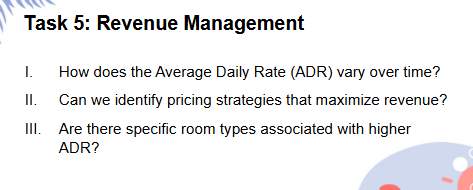

# ADR over Time

C:\Users\asher\AppData\Local\Temp\ipykernel_18928\3372783333.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


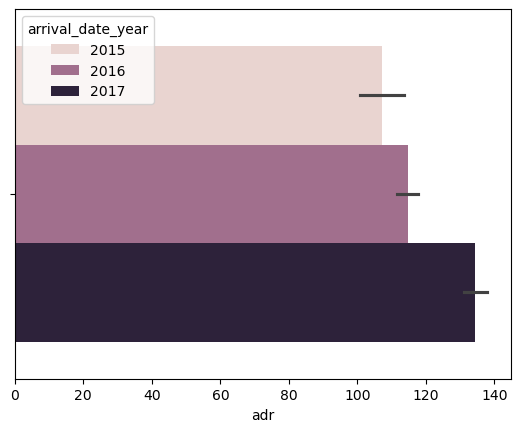

In [88]:
#hd['arrival_date_year']#['adr']
#fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x=hd['adr'],hue=hd['arrival_date_year'])
plt.show()

# as per this ADR   it increases over time

# IDENTIFY PRICING STRATEGIES THAT MAXIMIZE REVENUE

In [91]:
hd.info()#required_car_parking_spaces,reserved_room_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [99]:
import matplotlib.pyplot as plt

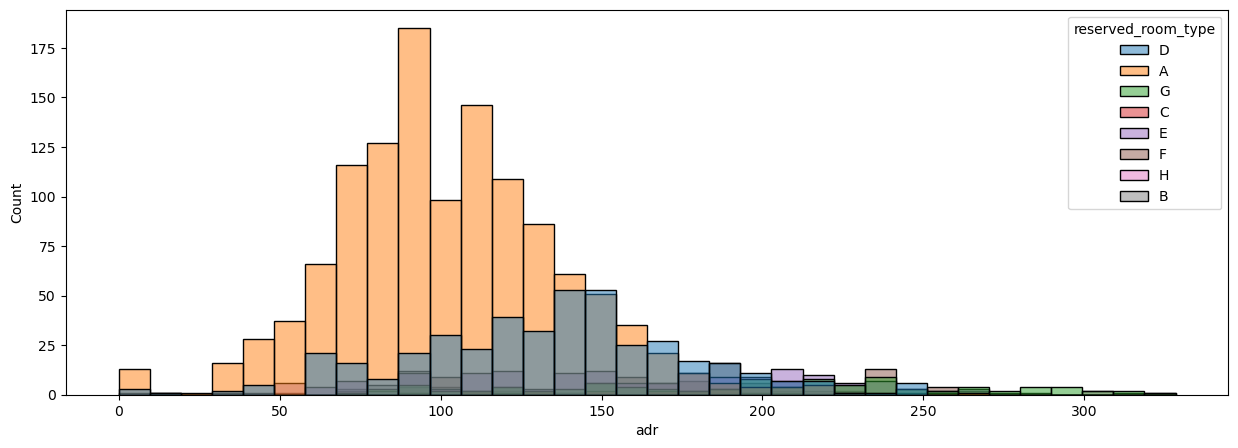

In [101]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=hd['adr'],hue=hd['reserved_room_type'])
plt.show()

# room type higher type the adr increases

# Are there specific room types with higher adr

In [103]:
p['adr'].max()

324.0

In [105]:
p=hd[hd['adr']>250]

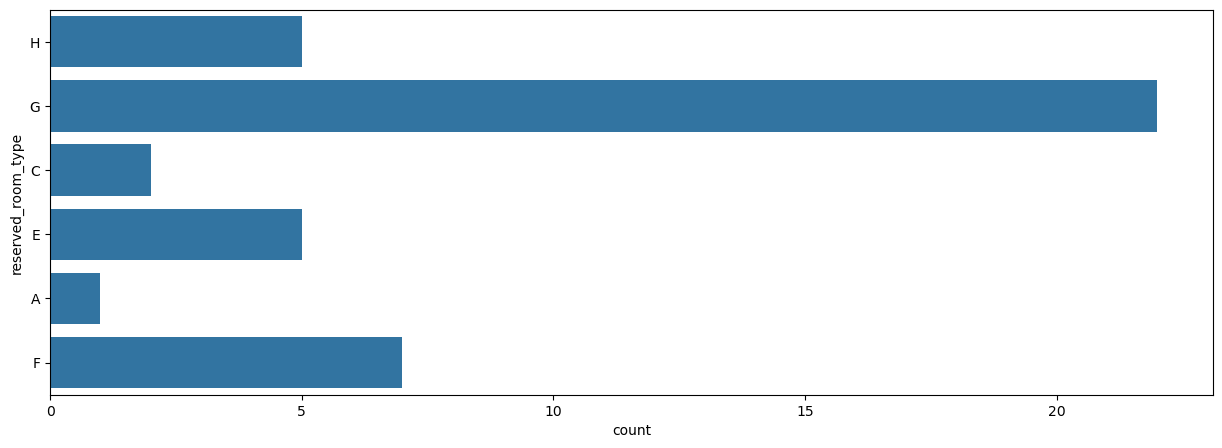

In [107]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(p['reserved_room_type'])
plt.show()

# these are specific roomtype with adr higher than 250 .Room G leads the list with maximum adr.

# 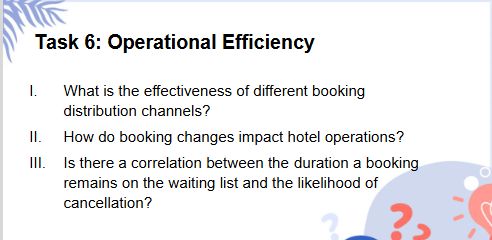

# The Effectiveness of Different Booking Distribution Channel's

C:\Users\asher\AppData\Local\Temp\ipykernel_18928\1114049488.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


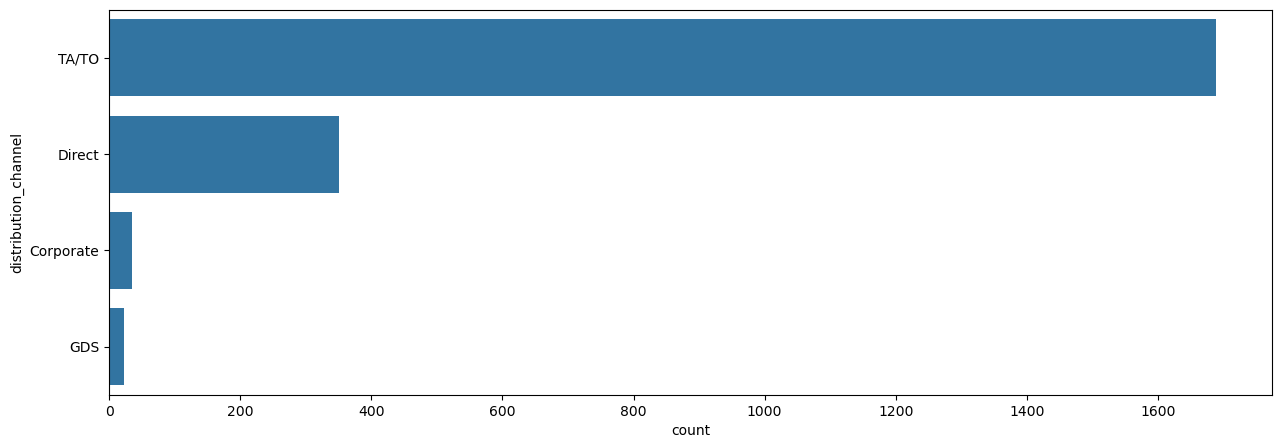

In [109]:
plt,fg=plt.subplots(figsize=(15,5))
sns.countplot(hd['distribution_channel'])
plt.show()

# TA/TO is the leading Booking Distribution Channel .

# 2) Booking changes  impact Hotel operations

In [111]:
p=hd[hd['is_canceled']==0]

In [113]:
import matplotlib.pyplot as plt

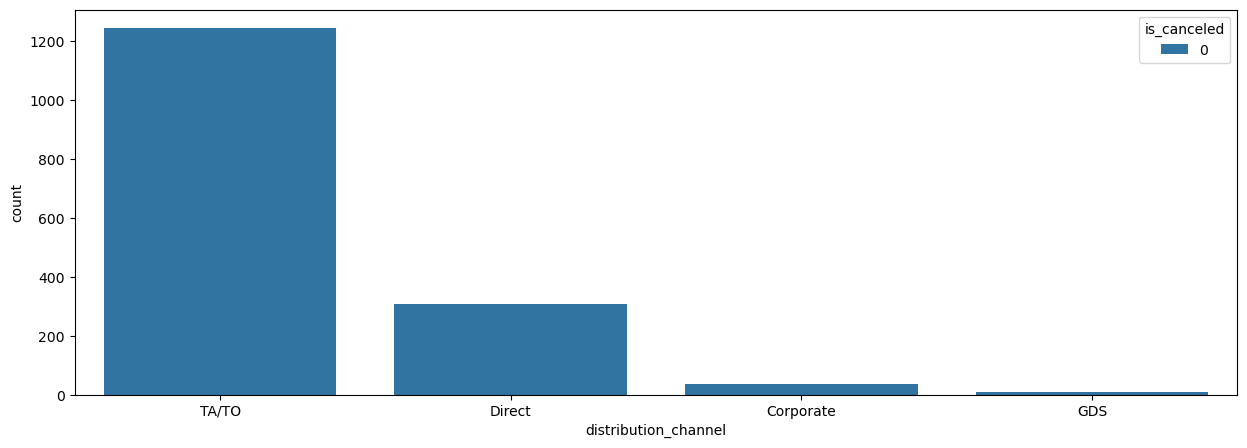

In [115]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x=p['distribution_channel'],hue=p['is_canceled'])
plt.show()

# effective customers who book don't cancel also remains same proportion signifying the effectiveness of Hotel Operations.

# 3)

In [117]:

hd['days_in_waiting_list'].corr(hd['previous_cancellations'])
#p['lead_time'].corr(p['is_canceled'])
#fig,ax=plt.subplots(figsize=(15,5))
#sns.histplot(y=hd['days_in_waiting_list'],x=hd['lead_time'])
#plt.show()

C:\Users\asher\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\asher\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

# no correlations between them

# 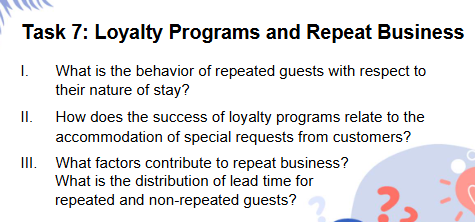

# Task 7: Loyalty Programs and Repeat Business

1)What is the behavior of repeated guests with respect to their nature of stay?


In [119]:
import matplotlib.pyplot as plt

C:\Users\asher\AppData\Local\Temp\ipykernel_18928\11877124.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


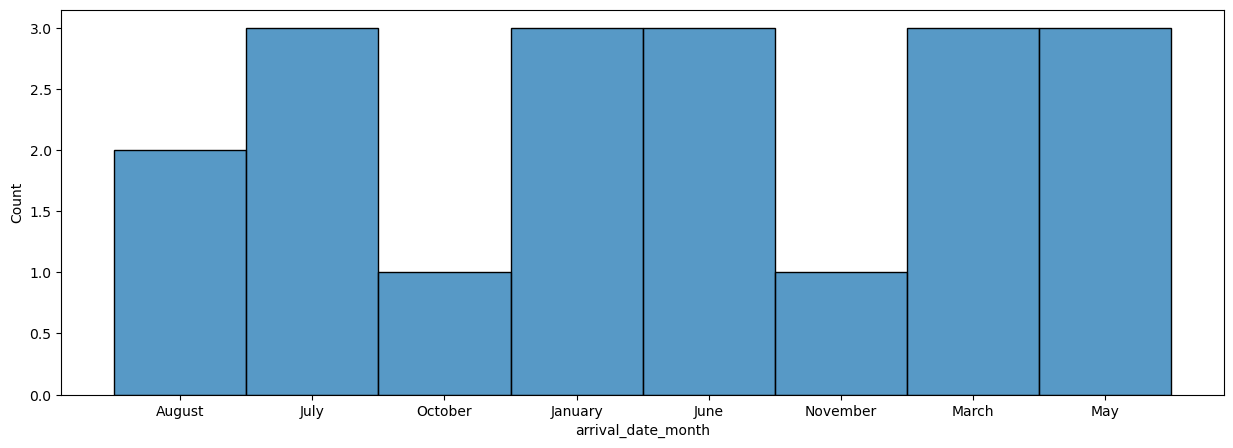

In [121]:
#hd.info()# is_repeated_guest
rep=hd[hd['is_repeated_guest']==1]
plt,ax=plt.subplots(figsize=(15,5))
sns.histplot(rep['arrival_date_month'])
plt.show()

# They  come and stay frequently especially during January,March,May,June,July

# 2)How does the success of loyalty programs relate to the accommodation of special requests from customers?


In [ ]:
#p.info()#total_of_special_requests


In [123]:
import matplotlib.pyplot as plt

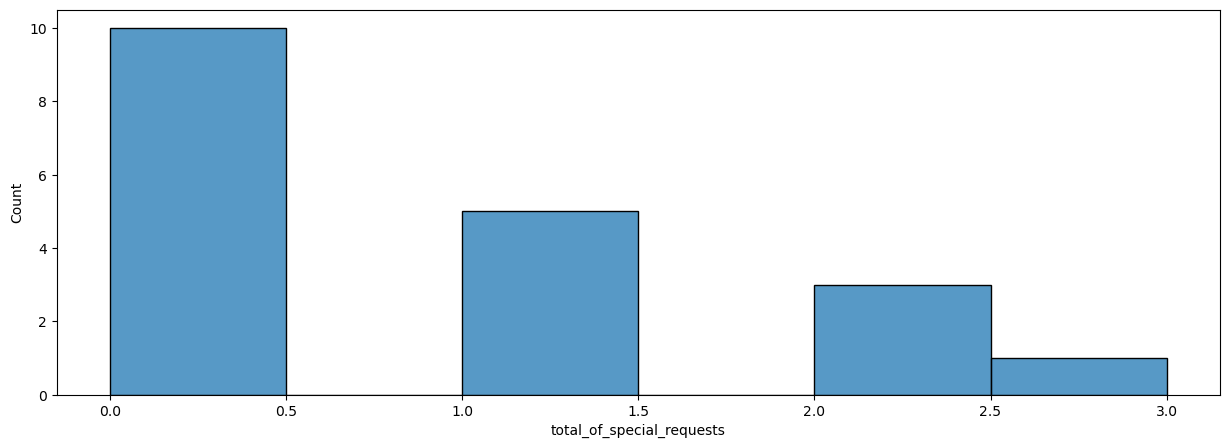

In [125]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(rep['total_of_special_requests'])
plt.show()

# mostly it does't relate to the accommodation of special requests from customers but in few cases it does as they have made 1,2,3 requests but most have made zero requests in the loyal customers.

# 3) What factors contribute to repeat business?
What is the distribution of lead time for
repeated and non-repeated guests?
?

In [127]:
rep.info()# lead_time

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 108 to 1949
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           19 non-null     object 
 1   is_canceled                     19 non-null     int64  
 2   lead_time                       19 non-null     int64  
 3   arrival_date_year               19 non-null     int64  
 4   arrival_date_month              19 non-null     object 
 5   arrival_date_week_number        19 non-null     int64  
 6   arrival_date_day_of_month       19 non-null     int64  
 7   stays_in_weekend_nights         19 non-null     int64  
 8   stays_in_week_nights            19 non-null     int64  
 9   adults                          19 non-null     int64  
 10  children                        19 non-null     int64  
 11  babies                          19 non-null     int64  
 12  meal                            19 non-

# distribution of lead time for repeated

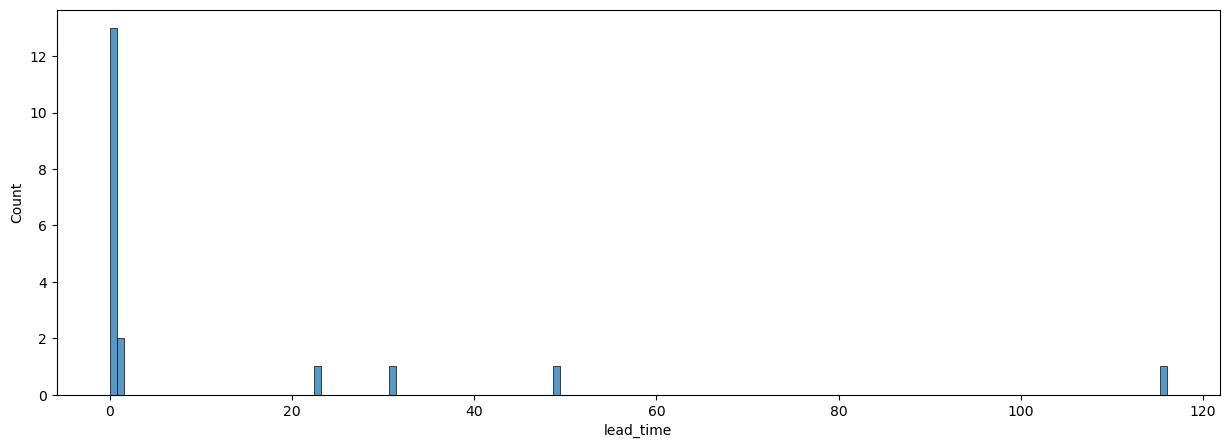

In [129]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(rep['lead_time'])
plt.show()

# so most repeated customer's book  on the spot

# distribution of lead time for non-repeated guests

In [131]:
nonrep=hd[hd['is_repeated_guest']==0]
nonrep

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,05-07-2015,2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,0,Transient,98.00,0,1,Check-Out,04-07-2015,2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,0,Transient,153.00,1,0,Check-Out,05-07-2015,2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,0,Transient,94.71,0,0,Check-Out,04-07-2015,2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,0,Transient,117.81,1,2,Check-Out,10-07-2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,0,Transient,132.53,0,2,Check-Out,29-08-2017,2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,0,Transient,147.68,0,0,Check-Out,01-09-2017,2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,0,Transient,80.10,0,1,Check-Out,01-09-2017,2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,0,Transient,117.00,0,1,Check-Out,03-09-2017,2017


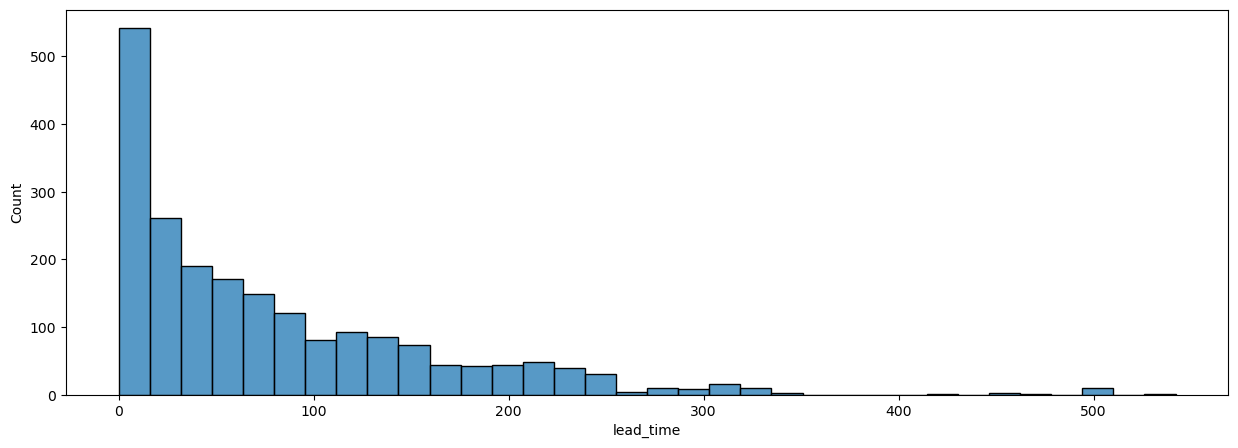

In [133]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(nonrep['lead_time'])
plt.show()

# in them also most book on around 550 book on the day of arrival